Rossmann Store Sales data is available via [Kaggle](https://www.kaggle.com/c/rossmann-store-sales). Its data from a chemist store that has over 6000 stores across Europe. 

In order to perform a cursory exploration of the data, lets first load the data. I will first explore just the train.csv.

In [21]:
%matplotlib inline
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import mpld3
import warnings
import seaborn as sns
sns.set(style='darkgrid')

#
warnings.filterwarnings('ignore')
#mpld3.enable_notebook()
#
# sales data, lets load the data
train = pd.read_csv('../data/rossmann_store_sales/train.csv')
# sort the dates 
train.sort_values(by='Date', ascending=True, inplace=True)
train.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1016473,379,2,2013-01-01,0,0,0,0,a,1
1016472,378,2,2013-01-01,0,0,0,0,a,1
1016471,377,2,2013-01-01,0,0,0,0,a,1
1016470,376,2,2013-01-01,0,0,0,0,a,1
1016469,375,2,2013-01-01,0,0,0,0,a,1
1016468,374,2,2013-01-01,0,0,0,0,a,1
1016467,373,2,2013-01-01,0,0,0,0,a,1
1016466,372,2,2013-01-01,0,0,0,0,a,1
1016465,371,2,2013-01-01,0,0,0,0,a,1


From the [data description](https://www.kaggle.com/c/rossmann-store-sales/data):
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.  Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

They have missed out DayOfWeek but it is quite obvious what that is.

When we are looking at sales or stores data, specific aspects of the business comes into play. Lets list those aspects (this list is representative/subjective and not exhaustive):
* when are the stores open?
* how does sales/customer trends looks like? are sales & customers data correlated all the time or only sometimes? If sometimes, then what are those days and what was different about those days?
* are there stores that are high/low performers?
* how many promos were organised? what days of the week do promos happen? how many coincide with holidays? do they have any effect on sales/customers?
* what days of the week do stores experience high/low traffic? what was different about those days?


I will now, address each one of these questions one by one. I will add more as and when I get the light-bulb moment!


#### when are the stores open during the week?

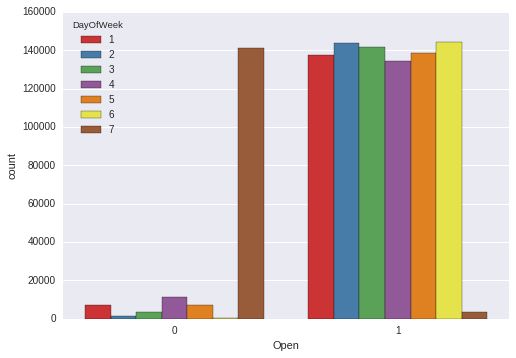

In [22]:
ax = sns.countplot(x='Open', hue='DayOfWeek', data=train, palette='Set1')

*Note: I keep switching between CentOS/Linux and Win10. Weirdly enough there is a TypeError and appears to be a ongoing [issue](https://github.com/mpld3/mpld3/issues/193) on Win10 which does not appear on CentOS/Linux*

From the histogram plot, it is obvious that day-7 has maximum number of 'closed' days. Therefore, there is high probability that day-7 is a Sunday. Therefore,the stores are open generally throughout the week except on Sundays.

#### how does sales/customer trends looks like? are sales & customers data correlated all the time or only sometimes? If sometimes, then what are those days and what was different about those days?

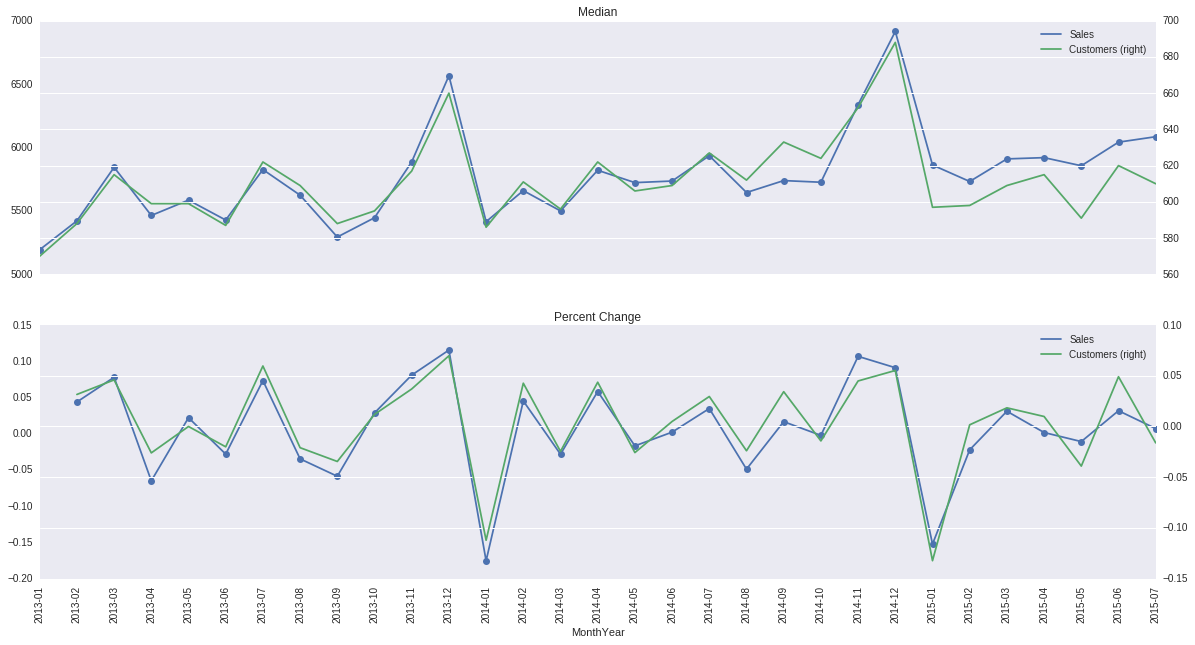

In [23]:
# lets collate sales and customer data on monthly and yearly charts
# split Year-Month-Date to three different columns
train['Month'] = train['Date'].apply(lambda x : int(str(x)[5:7]))
train['Year'] = train['Date'].apply(lambda x : int(str(x)[:4]))
train['MonthYear'] = train['Date'].apply(lambda x : (str(x)[:7]))
                                    
# median sales
median_sales = train.groupby('MonthYear')['Sales'].median()
pct_median_change = train.groupby('MonthYear')['Sales'].median().pct_change()
# median customers
median_cust = train.groupby('MonthYear')['Customers'].median()
pct_median_custchange = train.groupby('MonthYear')['Customers'].median().pct_change()

fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))
# plot median sales
ax1 = median_sales.plot(legend=True, ax=axis1, marker='o',title="Median")
ax1.set_xticks(range(len(median_sales)))
ax1.set_xticklabels(median_sales.index.tolist(), rotation=90)
#pd.rolling_mean(median_sales, window=7).plot(ax=axis1)
# plot pct change
ax2 = pct_median_change.plot(legend=True, ax=axis2, marker='o',rot=90, title="Percent Change")

# overlay customer data
median_cust.plot(legend=True, ax=axis1, marker='x', secondary_y=True)
pct_median_custchange.plot(legend=True, ax=axis2, marker='x', rot=90, secondary_y=True)

First and formost thing that is obvious from the plot is that sales and customers are highly correlated. Therefore, majority of customers walking through the store are contributing to sales. However, starting in year 2015, customer numbers are diverging slightly away from sales with less customers contributing to more sales. Could this be attributed to increase in cost per item? or customers are being loyal and ringing more sales than before? Customer growth is not evident. Sales and customer numbers appears to spike just before Christmas and fall back down again during the new year. If more customers could be enticed into the store, better sales could be acheived.

Lets plot the sales and customer data with promos, stateholiday and schoolholiday to visualise their behaviour for those days.

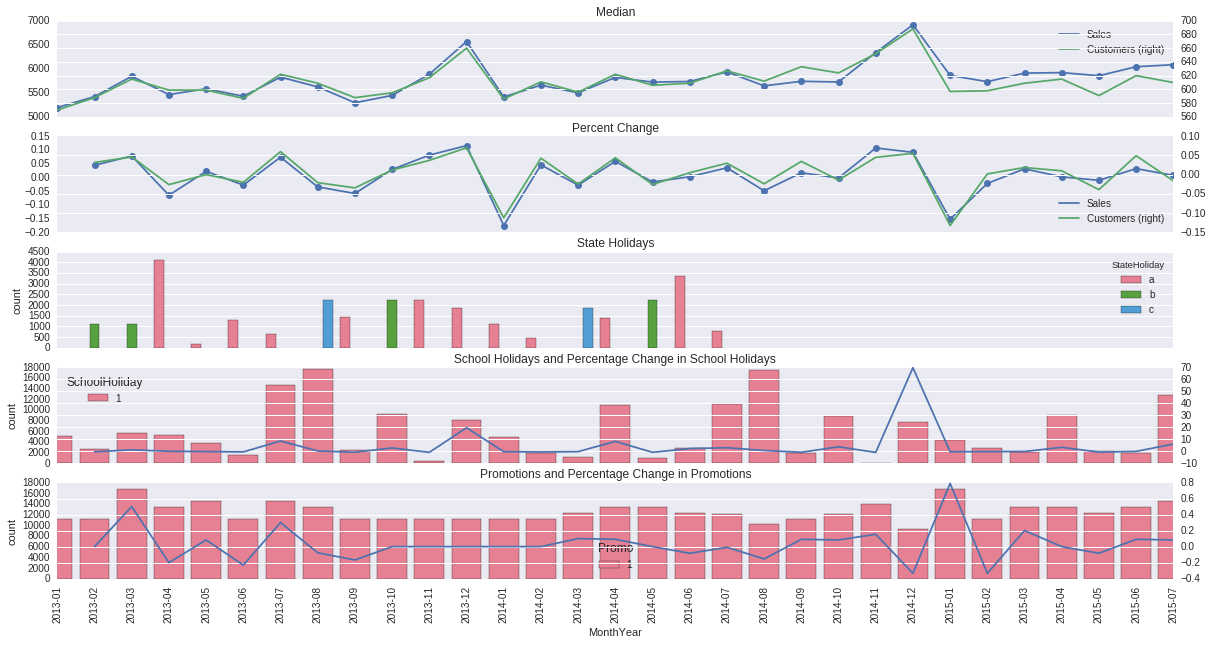

In [57]:
fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(5, 1, sharex=True, figsize=(20,10))
# plot median sales
ax1 = median_sales.plot(legend=True, ax=axis1, marker='o',title="Median")
ax1.set_xticks(range(len(median_sales)))
ax1.set_xticklabels(median_sales.index.tolist(), rotation=90)
#pd.rolling_mean(median_sales, window=7).plot(ax=axis1)
# plot pct change
ax2 = pct_median_change.plot(legend=True, ax=axis2, marker='o',rot=90, title="Percent Change")

# overlay customer data
median_cust.plot(legend=True, ax=axis1, marker='x', secondary_y=True)
pct_median_custchange.plot(legend=True, ax=axis2, marker='x', rot=90, secondary_y=True)

# stateholiday overlay
# StateHoliday has a mixture of "O", 0 and "0", replace these with "O"
train.StateHoliday.replace(["O",0,"0"],['O','O','O'], inplace=True)
ax3 = sns.countplot(x='MonthYear', hue='StateHoliday', data=train[train['StateHoliday']!='O'], palette='husl', ax=axis3)
tmp = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
tmp = ax3.set_title('State Holidays')
#schoolholiday overlay
ax4 = sns.countplot(x='MonthYear', hue='SchoolHoliday', data=train[train['SchoolHoliday']!=0], palette='husl', ax=axis4)
subs = train[train['SchoolHoliday']!=0]
cntchange = subs.groupby('MonthYear')['SchoolHoliday'].count().pct_change()
cntchange.plot(ax=axis4, marker='x', secondary_y=True)
tmp = ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
tmp = ax4.set_title('School Holidays and Percentage Change in School Holidays')
#promotions overlay
ax5 = sns.countplot(x='MonthYear', hue='Promo', data=train[train["Promo"]!=0], palette='husl', ax=axis5)
subs = train[train['Promo']!=0]
cntchange = subs.groupby('MonthYear')['Promo'].count().pct_change()
cntchange.plot(ax=axis5, marker='x', secondary_y=True)
tmp = ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90)
tmp = ax5.set_title('Promotions and Percentage Change in Promotions')

#### State Holidays
I think there is something amiss about the "StateHoliday" data. From August 2014, there appears to be no StateHoliday at all, which is highly unlikely, most likely it is the case of "missing data". That can be fixed by filling the values using previous years StateHolidays, as StateHolidays rarely change.

#### School Holidays
SchoolHolidays appears to be seasonal, with July-August being the highest, may be July-August is the summer vacation time. Interesting observation is that there are minimal/least school holidays in November i.e. before Christmas vacation. Another observation is the decreasing trend of school holidays reaching a minimum point just before the vacation starts. And on the other hand, after the vacation when the school restarts there is a increasing trend of school holidays with an abrupt drop after which the decreasing trend takes on.  This abrupt drop might be the school restart after a mid-term break.

#### Promotions
When you look at the number of promotions being held, it appears that every month there were promotions at various stores 

#### how many promos were organised? what days of the week do promos happen? how many coincide with holidays
As the data is collected from many stores, it might be meaningful if we look at the data from "a store" perspective to answer the above question. Therefore, I will consider median number of promos as a representative of promos held at a store.

It appears that there were no Promos on day-6 and day-7 in the entire dataset. Assuming that day-6 and day-7 are Saturday and Sunday, there were no Promotions on Saturday and Sunday.